In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer #Z-score variables

# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.calibration import calibration_curve

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation

# model validation imports
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline

In [ ]:
#Read and clean data
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/boutique.csv")

#df.isnull().sum() #missing 200 inseam_cm values
df.dropna(inplace = True)
df.reset_index(inplace = True)
df.head()

,index,year,gender,age,height_cm,waist_size_cm,inseam_cm,test_group,salary_self_report_in_k,months_active,num_purchases,amount_spent_annual
0,0,2020,woman,34.0,168,98,75.0,0,69.83,21,89,729.73
1,1,2020,man,28.0,168,88,76.0,0,61.39,7,32,621.73
2,2,2021,woman,18.0,170,95,75.0,0,80.55,2,25,820.82
3,3,2021,woman,43.0,167,97,75.0,0,82.98,4,89,880.33
4,4,2021,other,29.0,173,89,74.0,0,62.00,5,95,690.35


##Set-Up

In [ ]:
#Separate Data into predictors and outcome
predictors = ["gender", "age", "height_cm", "waist_size_cm", "inseam_cm", "test_group",
              "salary_self_report_in_k", "months_active", "num_purchases", "year"]
continuous = ["age", "height_cm", "waist_size_cm", "inseam_cm",
              "salary_self_report_in_k", "months_active", "num_purchases", "year"]
categorical = ["gender", "test_group"]

x = df[predictors]
y = df["amount_spent_annual"]

#TTS
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Linear Regression Model

In [ ]:
#Empty Model
pre = make_column_transformer((StandardScaler(), continuous),
                            (OneHotEncoder(), categorical),
                            remainder = "passthrough")

#Linear Regression
linear_regression = LinearRegression()

linear_pipe = Pipeline([("pre", pre),
                        ("model", linear_regression)])

#Fit
linear_pipe.fit(x_train, y_train)
#Predict
y_pred_train_linear = linear_pipe.predict(x_train)
y_pred_test_linear = linear_pipe.predict(x_test)


#Evaluation
print("Train MSE : ", mean_squared_error(y_train,y_pred_train_linear))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train_linear))
print("Train MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train_linear))
print("Train R2  : ", r2_score(y_train,y_pred_train_linear))
print("\n")
print("Test MSE  : ", mean_squared_error(y_test,y_pred_test_linear))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test_linear))
print("Test MAPE : ", mean_absolute_percentage_error(y_test,y_pred_test_linear))
print("Test R2  : ", r2_score(y_test,y_pred_test_linear))

Train MSE :  12950.329460168576
Train MAE :  89.69504664800402
Train MAPE:  0.12785716337718706
Train R2  :  0.5210701404556501


Test MSE  :  13092.910950576086
Test MAE  :  90.70228509610014
Test MAPE :  0.12940992754621644
Test R2  :  0.5253572102461301


In [ ]:
#Empty Model
pre = make_column_transformer((StandardScaler(), continuous),
                            (OneHotEncoder(), categorical),
                            remainder = "passthrough")

poly_pipe = Pipeline([("pre", pre),
                      ("poly", PolynomialFeatures(degree = 2)),
                      ("model", linear_regression)])


#Fit
poly_pipe.fit(x_train, y_train)

#Predict
y_pred_train_poly = poly_pipe.predict(x_train)
y_pred_test_poly = poly_pipe.predict(x_test)

print("Train MSE : ", mean_squared_error(y_train,y_pred_train_poly))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train_poly))
print("Train MAPE: ", mean_absolute_percentage_error(y_train,y_pred_train_poly))
print("Train R2  : ", r2_score(y_train,y_pred_train_poly))
print("")
print("Test MSE  : ", mean_squared_error(y_test,y_pred_test_poly))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test_poly))
print("Test MAPE : ", mean_absolute_percentage_error(y_test,y_pred_test_poly))
print("Test R2  : ", r2_score(y_test,y_pred_test_poly))



Train MSE :  3067.7519884057047
Train MAE :  44.23113274743855
Train MAPE:  0.059080771810841794
Train R2  :  0.886548212271897

Test MSE  :  3193.2484916119706
Test MAE  :  45.18401254037142
Test MAPE :  0.06107906286041063
Test R2  :  0.8842387015265422


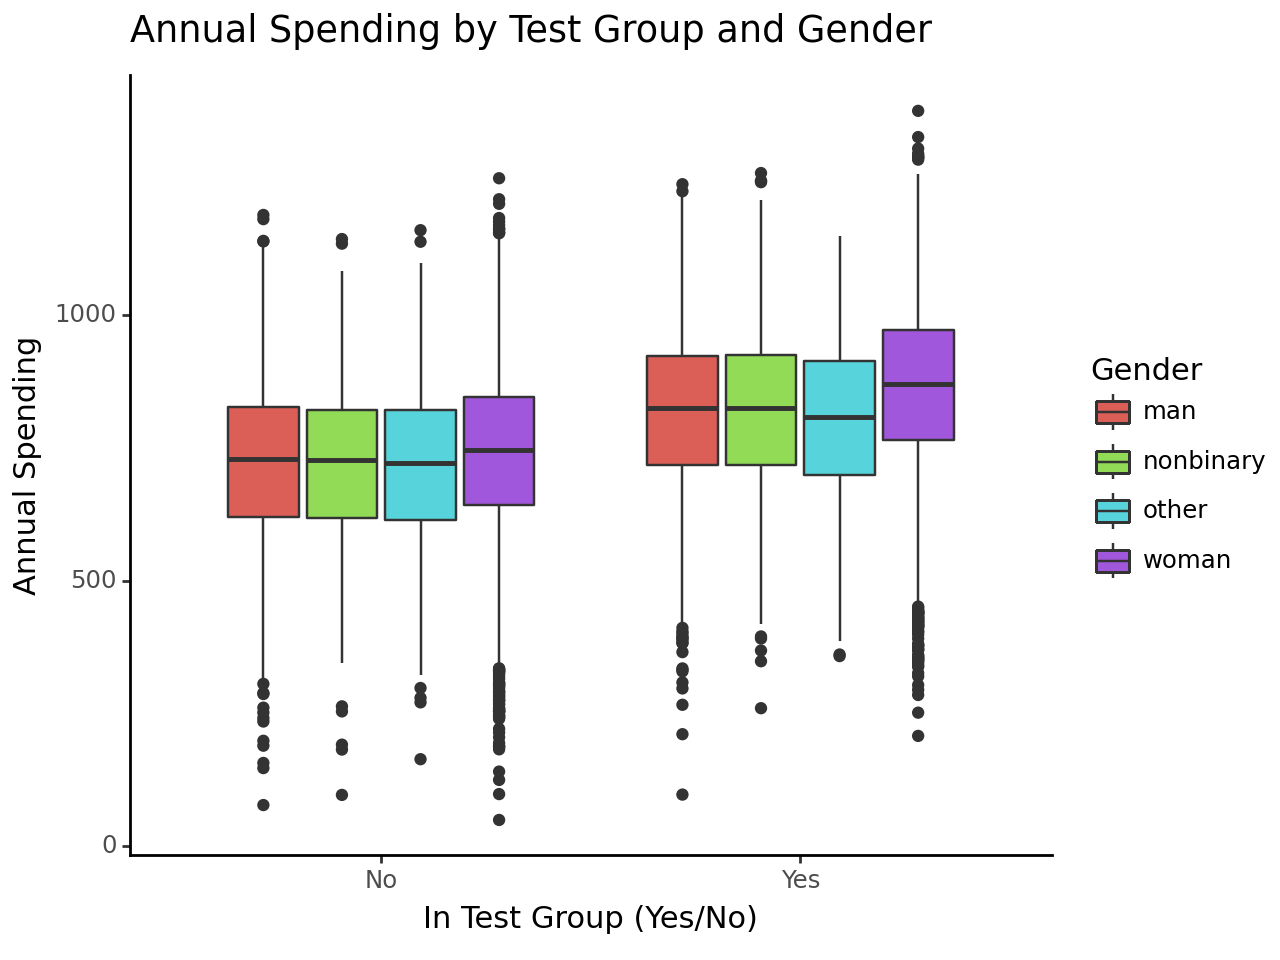

<Figure Size: (640 x 480)>

In [ ]:
#Does being in the experimental test_group actually increase the amount a customer spends at the store? Is this relationship different for the different genders?
(ggplot(df, aes(x = "factor(test_group)", y = "amount_spent_annual", fill = "gender")) +
 geom_boxplot() +
 labs(title = "Annual Spending by Test Group and Gender",
      x = "In Test Group (Yes/No)",
      y = "Annual Spending",
      fill = "Gender") +
 scale_x_discrete(labels=("No", "Yes")) +
 theme_classic())

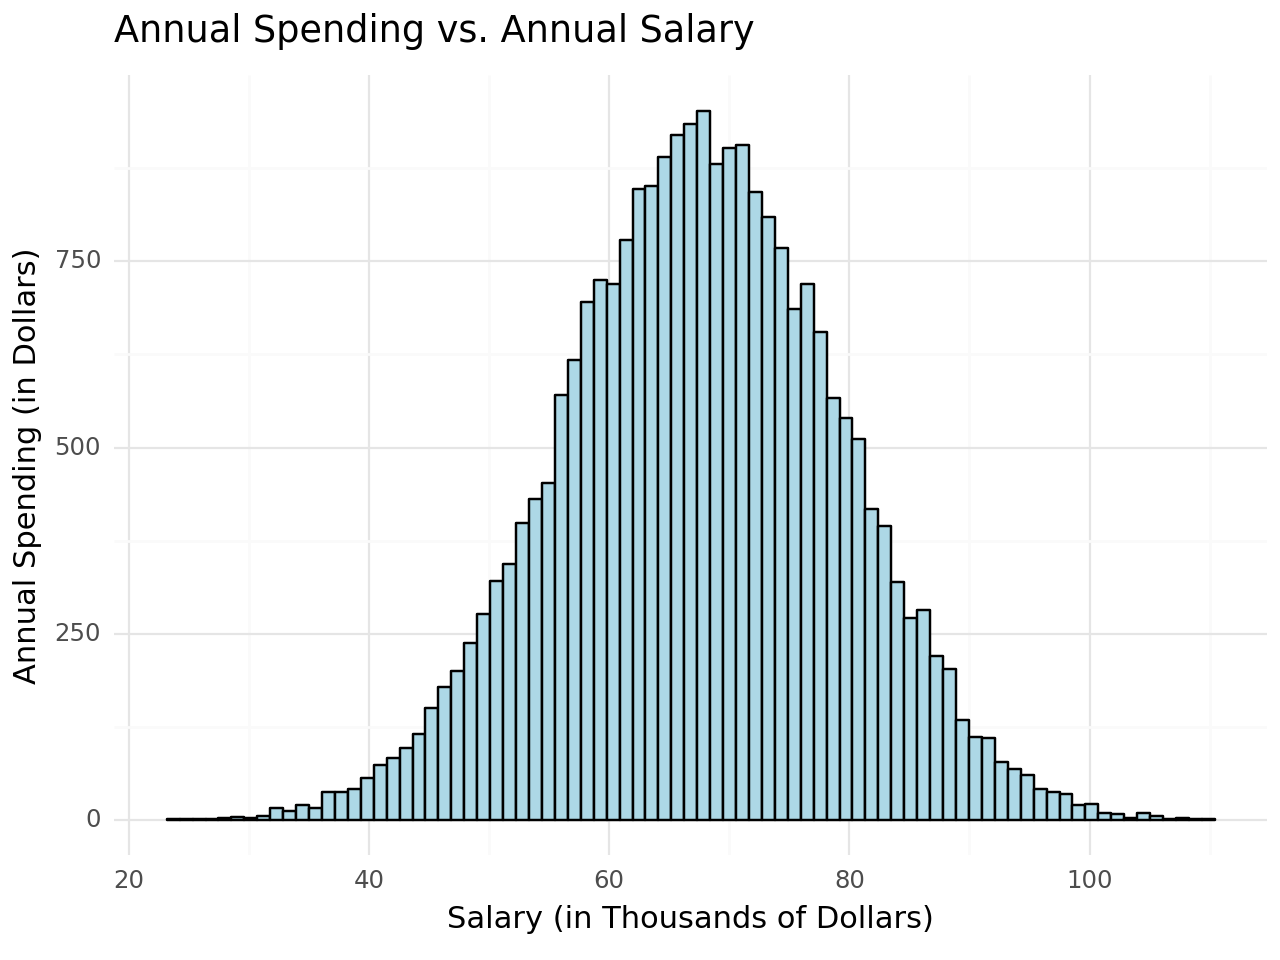

<Figure Size: (640 x 480)>

In [ ]:
#Does making more money (salary) tend to increase the number of purchases someone makes? Does it increase the total amount spent?
(ggplot(df, aes(x = "salary_self_report_in_k", y = "amount_spent_annual")) +
 geom_histogram(y = "amount_spent_annual", fill = "lightblue", color = "black") +
 labs(title = "Annual Spending vs. Annual Salary",
      x = "Salary (in Thousands of Dollars)",
      y = "Annual Spending (in Dollars)",) +
 theme_minimal())